## Context
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

## Content
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
- Risk (Value target - Good or Bad Risk)

#Importation des bibliotheques necessaires

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Chargement des datasets

In [154]:
# installing gdown to download files from Google Drive

!pip install gdown

In [155]:

# importing gdown
import gdown


In [156]:
#Chargement des datasets via google drive


      # Chargement des donnees d'entrainement (german_credit_data_with_target.xls)

      #https://drive.google.com/file/d/1qmvv7yUKxzIVCqKHTYLFf55uKWfGHo72/view?usp=sharing

file1_id = "1qmvv7yUKxzIVCqKHTYLFf55uKWfGHo72" #  id actuel du fichier
#output_file: fichier de sortie
output_file1 = "german_credit_data_with_target.csv"
#download  the file: telechargement du fichier
gdown.download(id=file1_id, output=output_file1, quiet=False)

df_train = pd.read_csv(output_file1,index_col = 0)

Downloading...
From: https://drive.google.com/uc?id=1qmvv7yUKxzIVCqKHTYLFf55uKWfGHo72
To: /content/german_credit_data_with_target.csv
100%|██████████| 53.4k/53.4k [00:00<00:00, 54.6MB/s]


In [157]:
# Chargement des donnees de test (german_credit_data.xls)


#https://drive.google.com/file/d/1iY9l5AuTRbr3_GyT_DJcJ1CiqHs9p1EF/view?usp=sharing

file2_id = "1iY9l5AuTRbr3_GyT_DJcJ1CiqHs9p1EF" #  id actuel du fichier
#output_file: fichier de sortie
output_file2 = "german_credit_data_test.csv"
#download  the file: telechargement du fichier
gdown.download(id=file2_id, output=output_file2, quiet=False)

df_test = pd.read_csv(output_file2, index_col=0)

Downloading...
From: https://drive.google.com/uc?id=1iY9l5AuTRbr3_GyT_DJcJ1CiqHs9p1EF
To: /content/german_credit_data_test.csv
100%|██████████| 49.7k/49.7k [00:00<00:00, 54.3MB/s]


#Exploratory Data Analysis



In [158]:
df_train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [159]:
df_train.shape

(1000, 10)

In [160]:
df_test.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [161]:
df_test.shape

(1000, 9)

In [162]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [163]:

#Valeurs manquantes
df_train.isnull().sum()

#Valeurs dupliquées
df_train.duplicated().sum()



0

In [164]:
#Analyse descriptive

df_train.describe()


,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


#Analyse statistique

*Separation des variables categoriques et numeriques*

Variables numeriques

In [165]:
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns



*Variables categorielles*

In [166]:
categorical_columns = df_train.select_dtypes(include=['object']).columns



*Analyse univariée des variables numeriques*

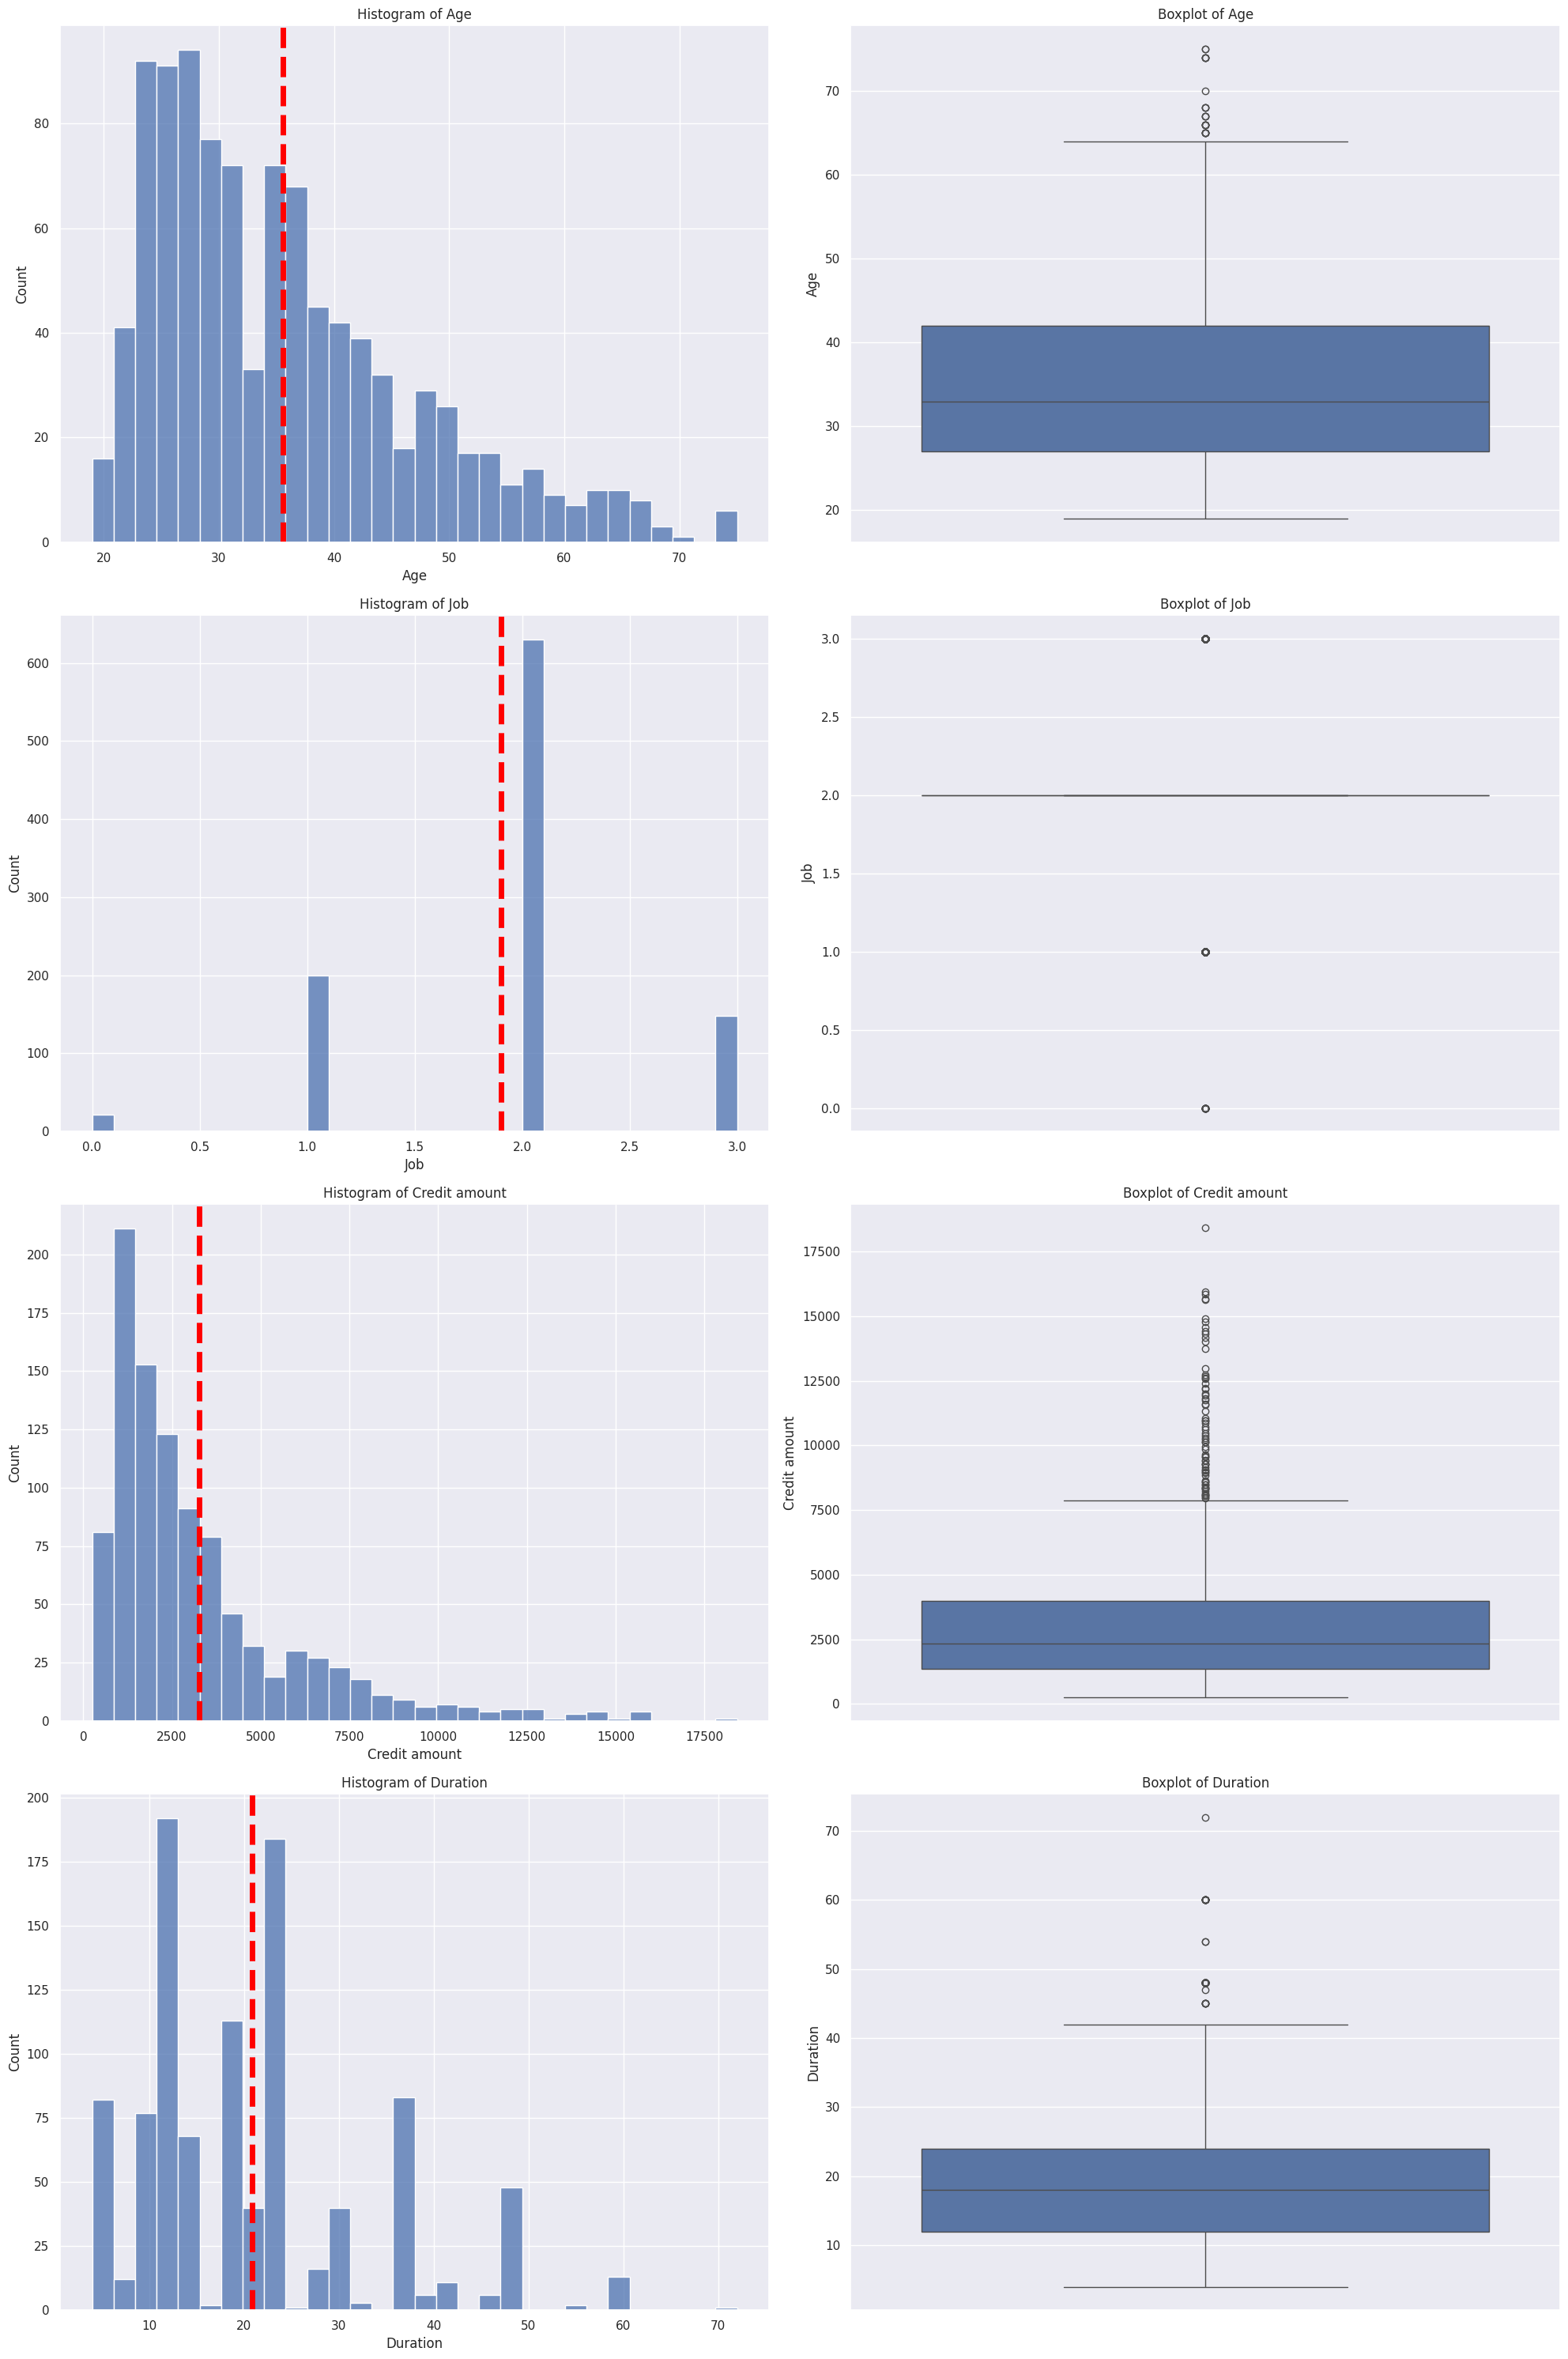

In [167]:





# definition du style de graphique
sns.set(style="darkgrid")
#nombre de colonnes
n_plots = len(numerical_columns)

#creation de la figure et d'un tableau d'axes
fig, ax = plt.subplots(n_plots, 2, figsize=(20, 30))
#fig, ax = plt.subplots(n_plots, 2, figsize=(20, 60))

# boucle pour obtenir l'index et le nom de la colonne
for i, col in enumerate(numerical_columns):
  # creation d'un histogramme pour chaque colone numerique actuelle
  sns.histplot(df_train[col], ax=ax[i][0], bins=30)


    # Ajoute une ligne verticale à la moyenne de la variable var
  #plt.axvline(df_train[col].mean(), ax=ax[i][0], color='red', linestyle='--', linewidth=5)
  ax[i][0].axvline(df_train[col].mean(), color='red', linestyle='--', linewidth=5)


  # titre de l'histogramme
  ax[i][0].set_title(f"Histogram of {col}")

  #Cette ligne crée un boxplot pour la colonne numérique actuelle col
  sns.boxplot(df_train[col], ax=ax[i][1])
  ax[i][1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show(); plt.close('all')

*Analyse univariée des variables categorielles*

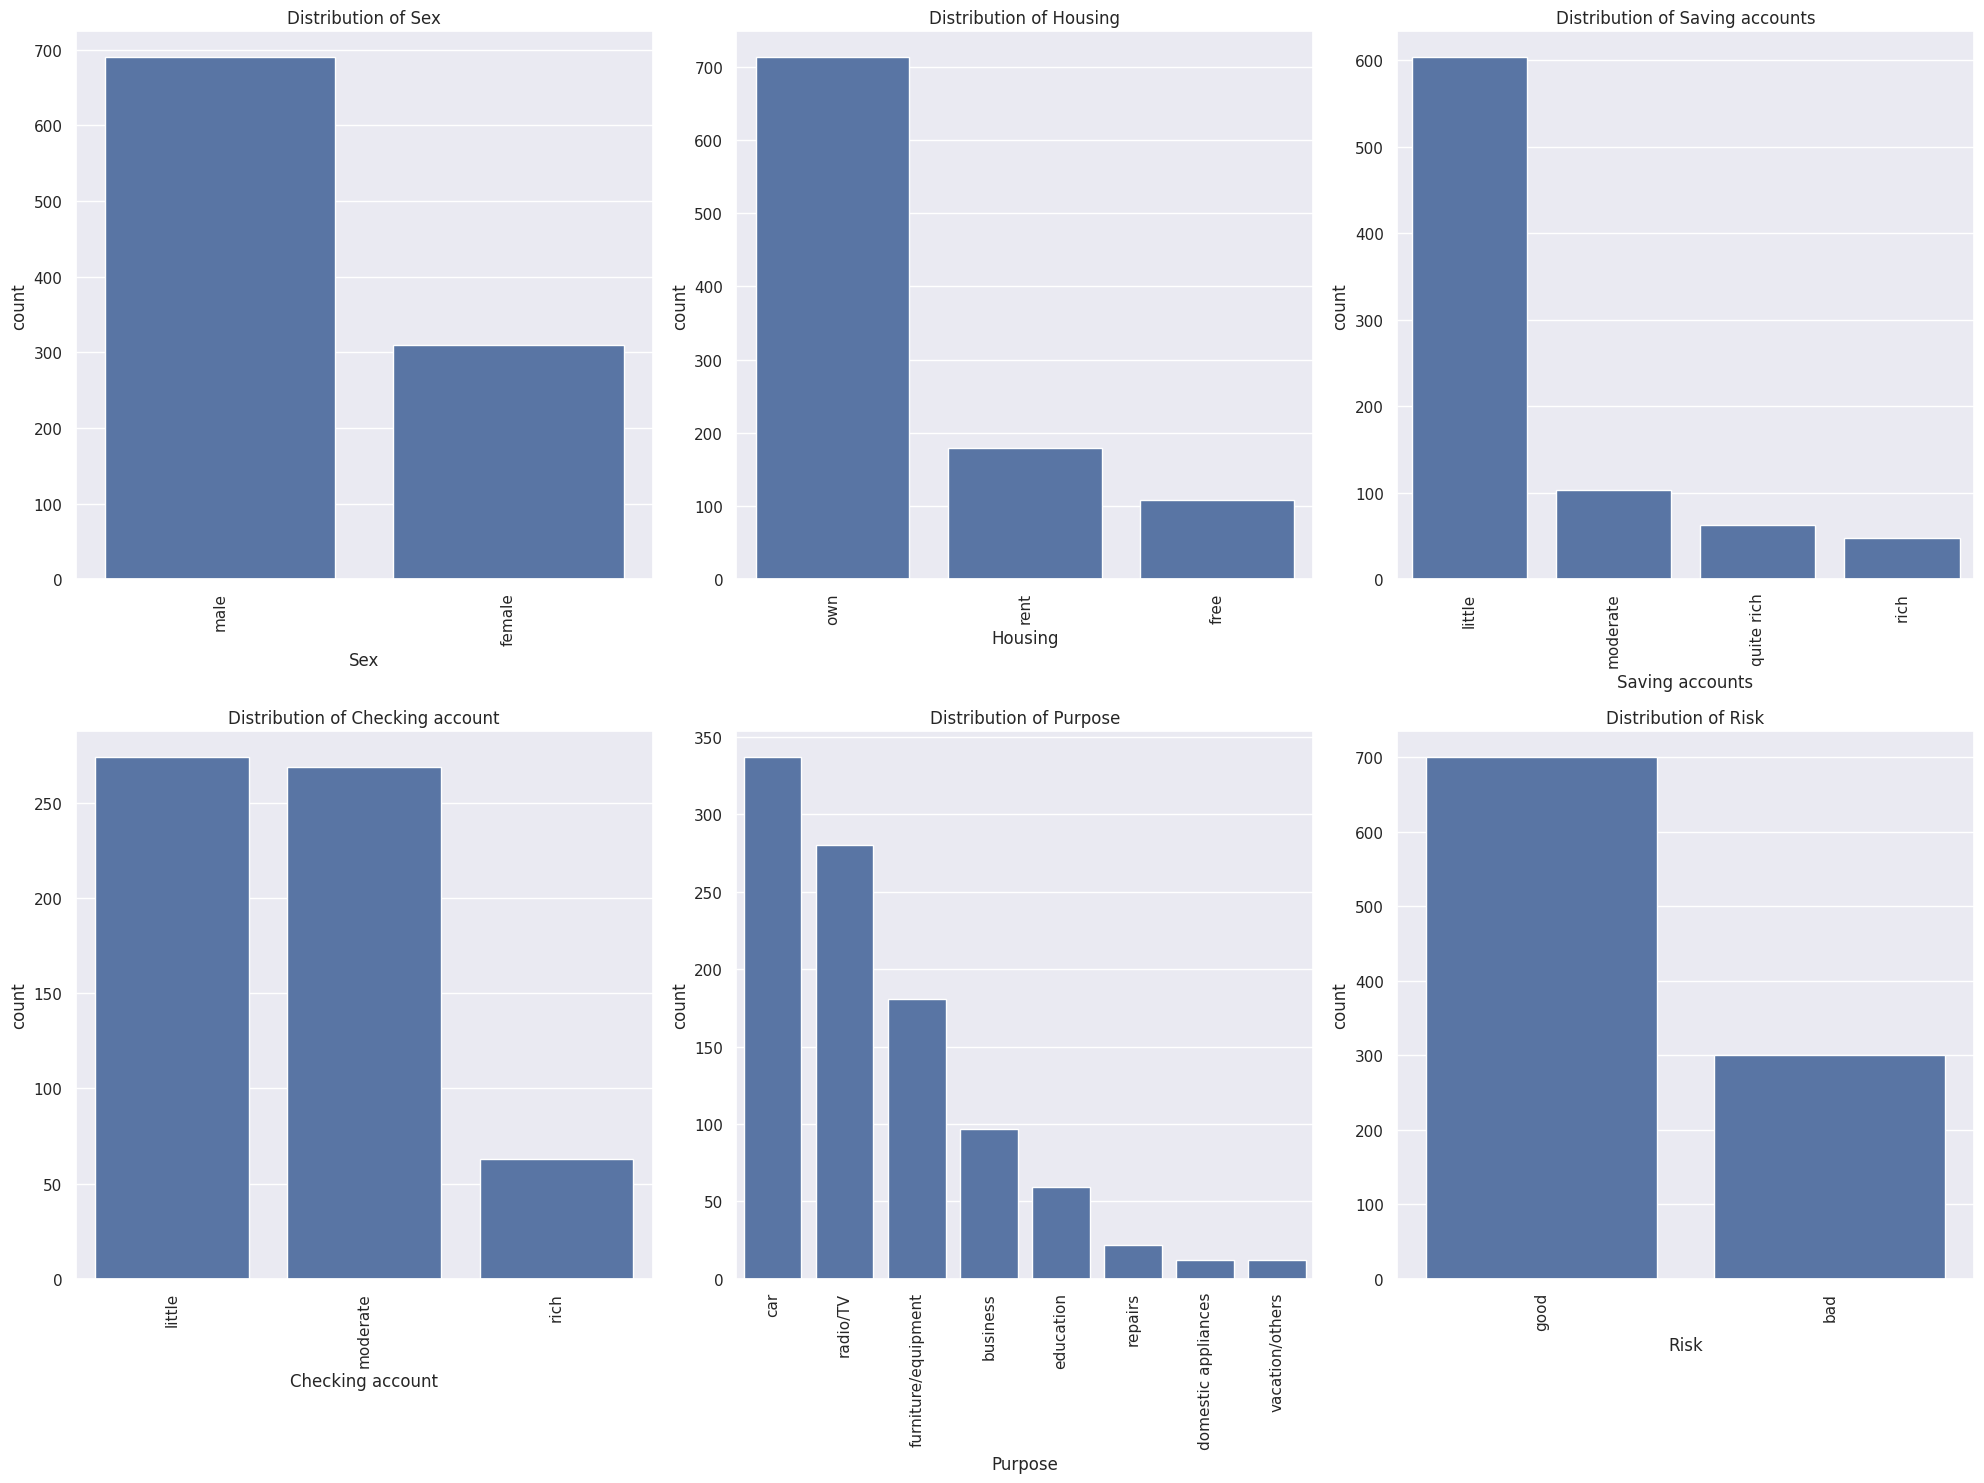

In [168]:
# definition du style de graphique
sns.set(style="darkgrid")

plt.figure(figsize=(20, 15))


# Boucle à travers chaque variable catégorique
for i, var in enumerate(categorical_columns, 1):
    # Crée un sous-graphe dans une grille de 3x3, indexée par i
    plt.subplot(2, 3, i)

    # Trace un graphique de comptage pour la variable var
    sns.countplot(x=var, data=df_train, order=df_train[var].value_counts().index)

    # Titre du sous-graphe
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=90)

# Ajuste l'espacement entre les sous-graphiques pour éviter le chevauchement
plt.tight_layout()

# Affiche les graphiques
plt.show()

# Ferme toutes les figures ouvertes pour libérer la mémoire
plt.close('all')

# Analyse bivariee

*Analyse bivariee des variables numeriques*

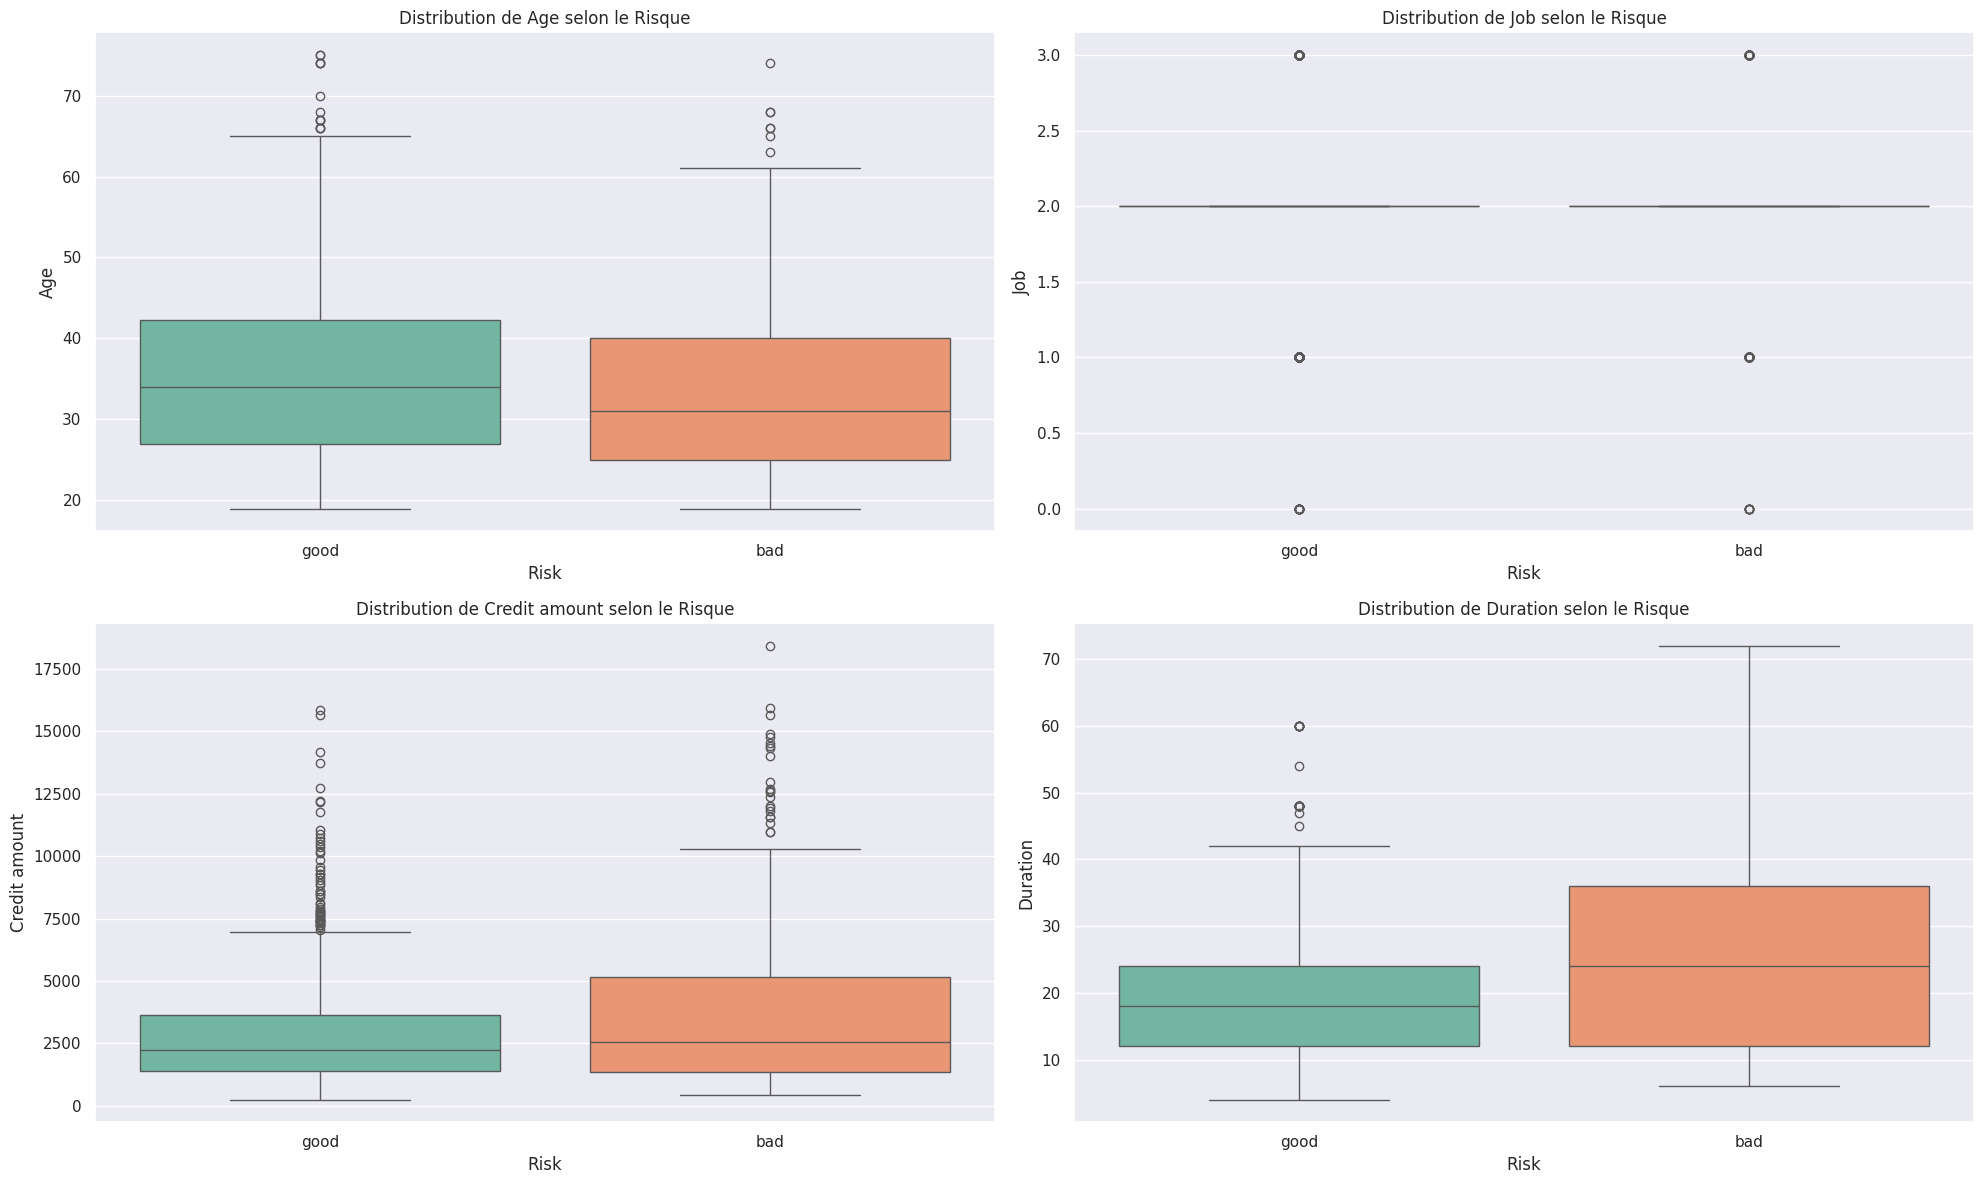

In [169]:

plt.figure(figsize=(20, 12))

# Boucle pour chaque variable numérique
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Risk', y=col, data=df_train, hue='Risk', palette='Set2')
    plt.title(f"Distribution de {col} selon le Risque")

plt.tight_layout()
plt.show(); plt.close('all')



*Matrice de correlation des variables numeriques*

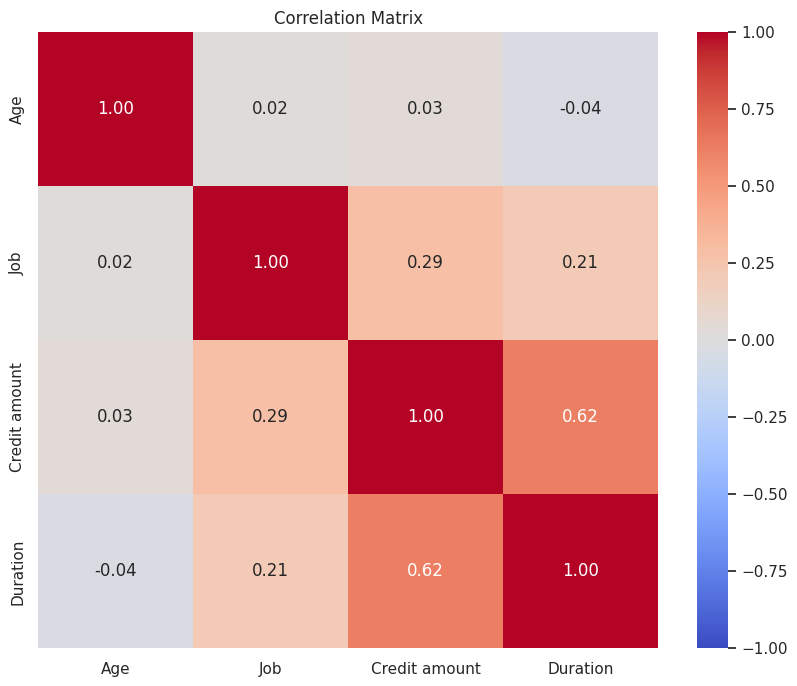

In [170]:



# Calcule la matrice de corrélation entre les variables numériques de df_train
correlation_matrix = df_train[numerical_columns].corr()

# Définit la taille de la figure pour que la heatmap soit lisible
plt.figure(figsize=(10, 8))

# Affiche une heatmap pour visualiser les corrélations entre les variables
sns.heatmap(
    correlation_matrix,       # Utilise la matrice de corrélation
    annot=True,               # Affiche les valeurs numériques dans chaque case
    cmap='coolwarm',          # Utilise un dégradé de couleur bleu (négatif) à rouge (positif)
    fmt='.2f',                # Formate les valeurs avec 2 chiffres après la virgule
    vmin=-1, vmax=1           # Fixe les valeurs min et max pour la légende de couleur
)

# Ajoute un titre au graphique
plt.title('Correlation Matrix')

# Affiche la figure
plt.show()

# Ferme toutes les figures actives pour éviter d'occuper inutilement la mémoire
plt.close('all')


*Analyse bivariee des variables categorielles*

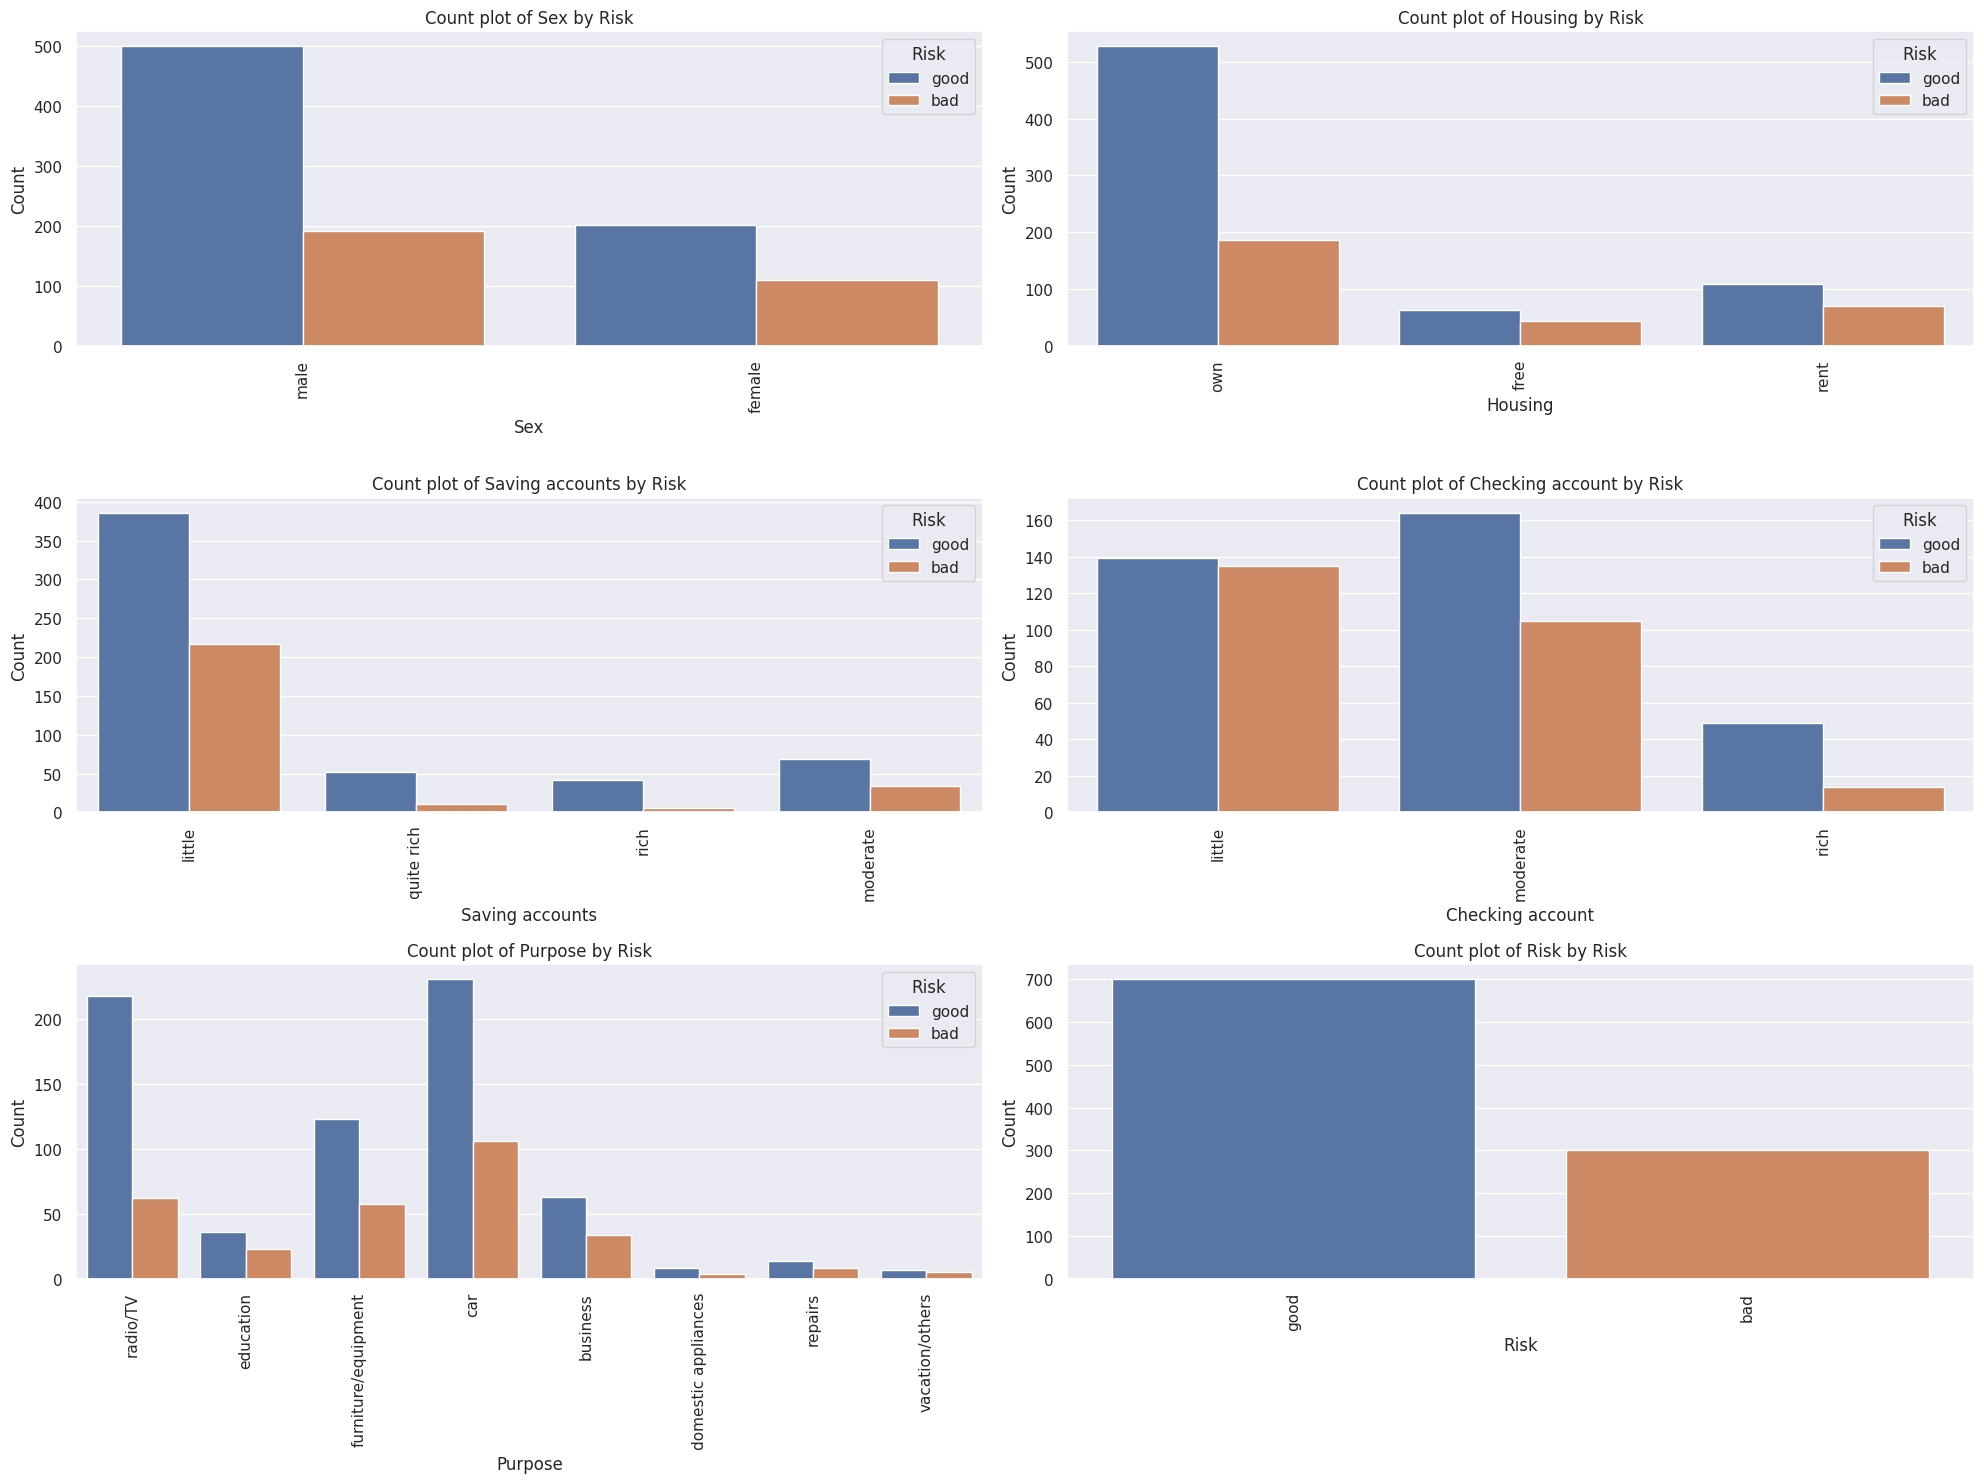

In [171]:
#fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_columns, 1):
  plt.subplot(3, 2, i)
  sns.countplot(x=feature, hue='Risk', data=df_train)
  plt.title(f'Count plot of {feature} by Risk')
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.xticks(rotation=90)

plt.tight_layout()
plt.show(); plt.close('all')


#   ax  = axes[i]
#   sns.countplot(x=feature, hue='Risk', data=df_train, ax=ax)
#   ax.set_title(f'Count plot of {feature} by Risk')
#   ax.set_xlabel(feature)
#   ax.set_ylabel('Count')

# plt.tight_layout()
# plt.show()
# plt.close('all')

# Data Preprocessing

*Valeurs manquantes*

In [172]:
df_train.isnull().sum()

,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0
Risk,0


In [173]:
df_train.dtypes

,0
Age,int64
Sex,object
Job,int64
Housing,object
Saving accounts,object
Checking account,object
Credit amount,int64
Duration,int64
Purpose,object
Risk,object


In [174]:
#Remplacer les valeurs manquantes par la valeur la plus frequente (le mode ) de la colonne


# Remplir les valeurs manquantes avec la valeur la plus fréquente (mode)
df_train['Saving accounts'].fillna(df_train['Saving accounts'].mode()[0], inplace=True)
df_train['Checking account'].fillna(df_train['Checking account'].mode()[0], inplace=True)



<ipython-input-174-a2dfd45619ad>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Saving accounts'].fillna(df_train['Saving accounts'].mode()[0], inplace=True)
<ipython-input-174-a2dfd45619ad>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

In [175]:
df_train['Saving accounts'].value_counts()

,count
Saving accounts,
little,786
moderate,103
quite rich,63
rich,48


*Traitement des valeurs aberrantes*


In [176]:
# # Boucle à travers chaque colonne dans la liste des colonnes
# for col in numerical_columns:
#     # Calculer le Z-score pour chaque valeur dans la colonne, en omettant les valeurs NaN
#     # le Z-score correpond en statistique a la loi normale :
#     z = np.abs(stats.zscore(df_train[col], nan_policy='omit'))

#     # Sélectionner les valeurs dont le Z-score est supérieur à 3 (outliers)
#     outliers = df_train[col][z > 2]

#     # Imprimer le nombre d'outliers trouvés pour chaque colonne
#     print(f"{col} has {len(outliers)} outliers")

In [177]:
# # Boucle à travers chaque colonne dans la liste des colonnes
# for col in numerical_columns:
#     # Calculer la skewness (asymétrie) pour chaque colonne
#     skew = df_train[col].skew()

#     # Imprimer la skewness trouvée pour chaque colonne
#     print(f"{col} has a skewness of {skew}")

In [178]:
# Pour l'age, on skew = 1.02 ce qui signifie qu'il ya
# Skewness > 0 : Cela signifie que la distribution de l'âge est asymétrique à droite (asymétrie positive).
#   - mediane proche du Q1
#   - La queue droite est plus longue que la queue gauche.
#   conclusion : il y a quelques individus plus âgés (valeurs extrêmes à droite), mais la majorité des personnes sont plus jeunes

# Skewness < 0 : Cela signifie que la distribution de l'emploi est légèrement asymétrique à gauche (asymétrie négative).

In [179]:

# Parcours de chaque colonne numérique
for col in numerical_columns:
    # Calcul des quartiles et de l'IQR pour chaque colonne
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1

    # Définition des bornes inférieure et supérieure pour le clipping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clipping des valeurs en dehors des bornes
    df_train[col] = df_train[col].clip(lower=lower_bound, upper=upper_bound)

# Vérification des résultats après clipping
print(df_train[numerical_columns].describe())


               Age     Job  Credit amount     Duration
count  1000.000000  1000.0    1000.000000  1000.000000
mean     35.453500     2.0    3051.101000    20.307000
std      11.106324     0.0    2187.140403    10.615151
min      19.000000     2.0     250.000000     4.000000
25%      27.000000     2.0    1365.500000    12.000000
50%      33.000000     2.0    2319.500000    18.000000
75%      42.000000     2.0    3972.250000    24.000000
max      64.500000     2.0    7882.375000    42.000000


Verification apres traitemement des outliers

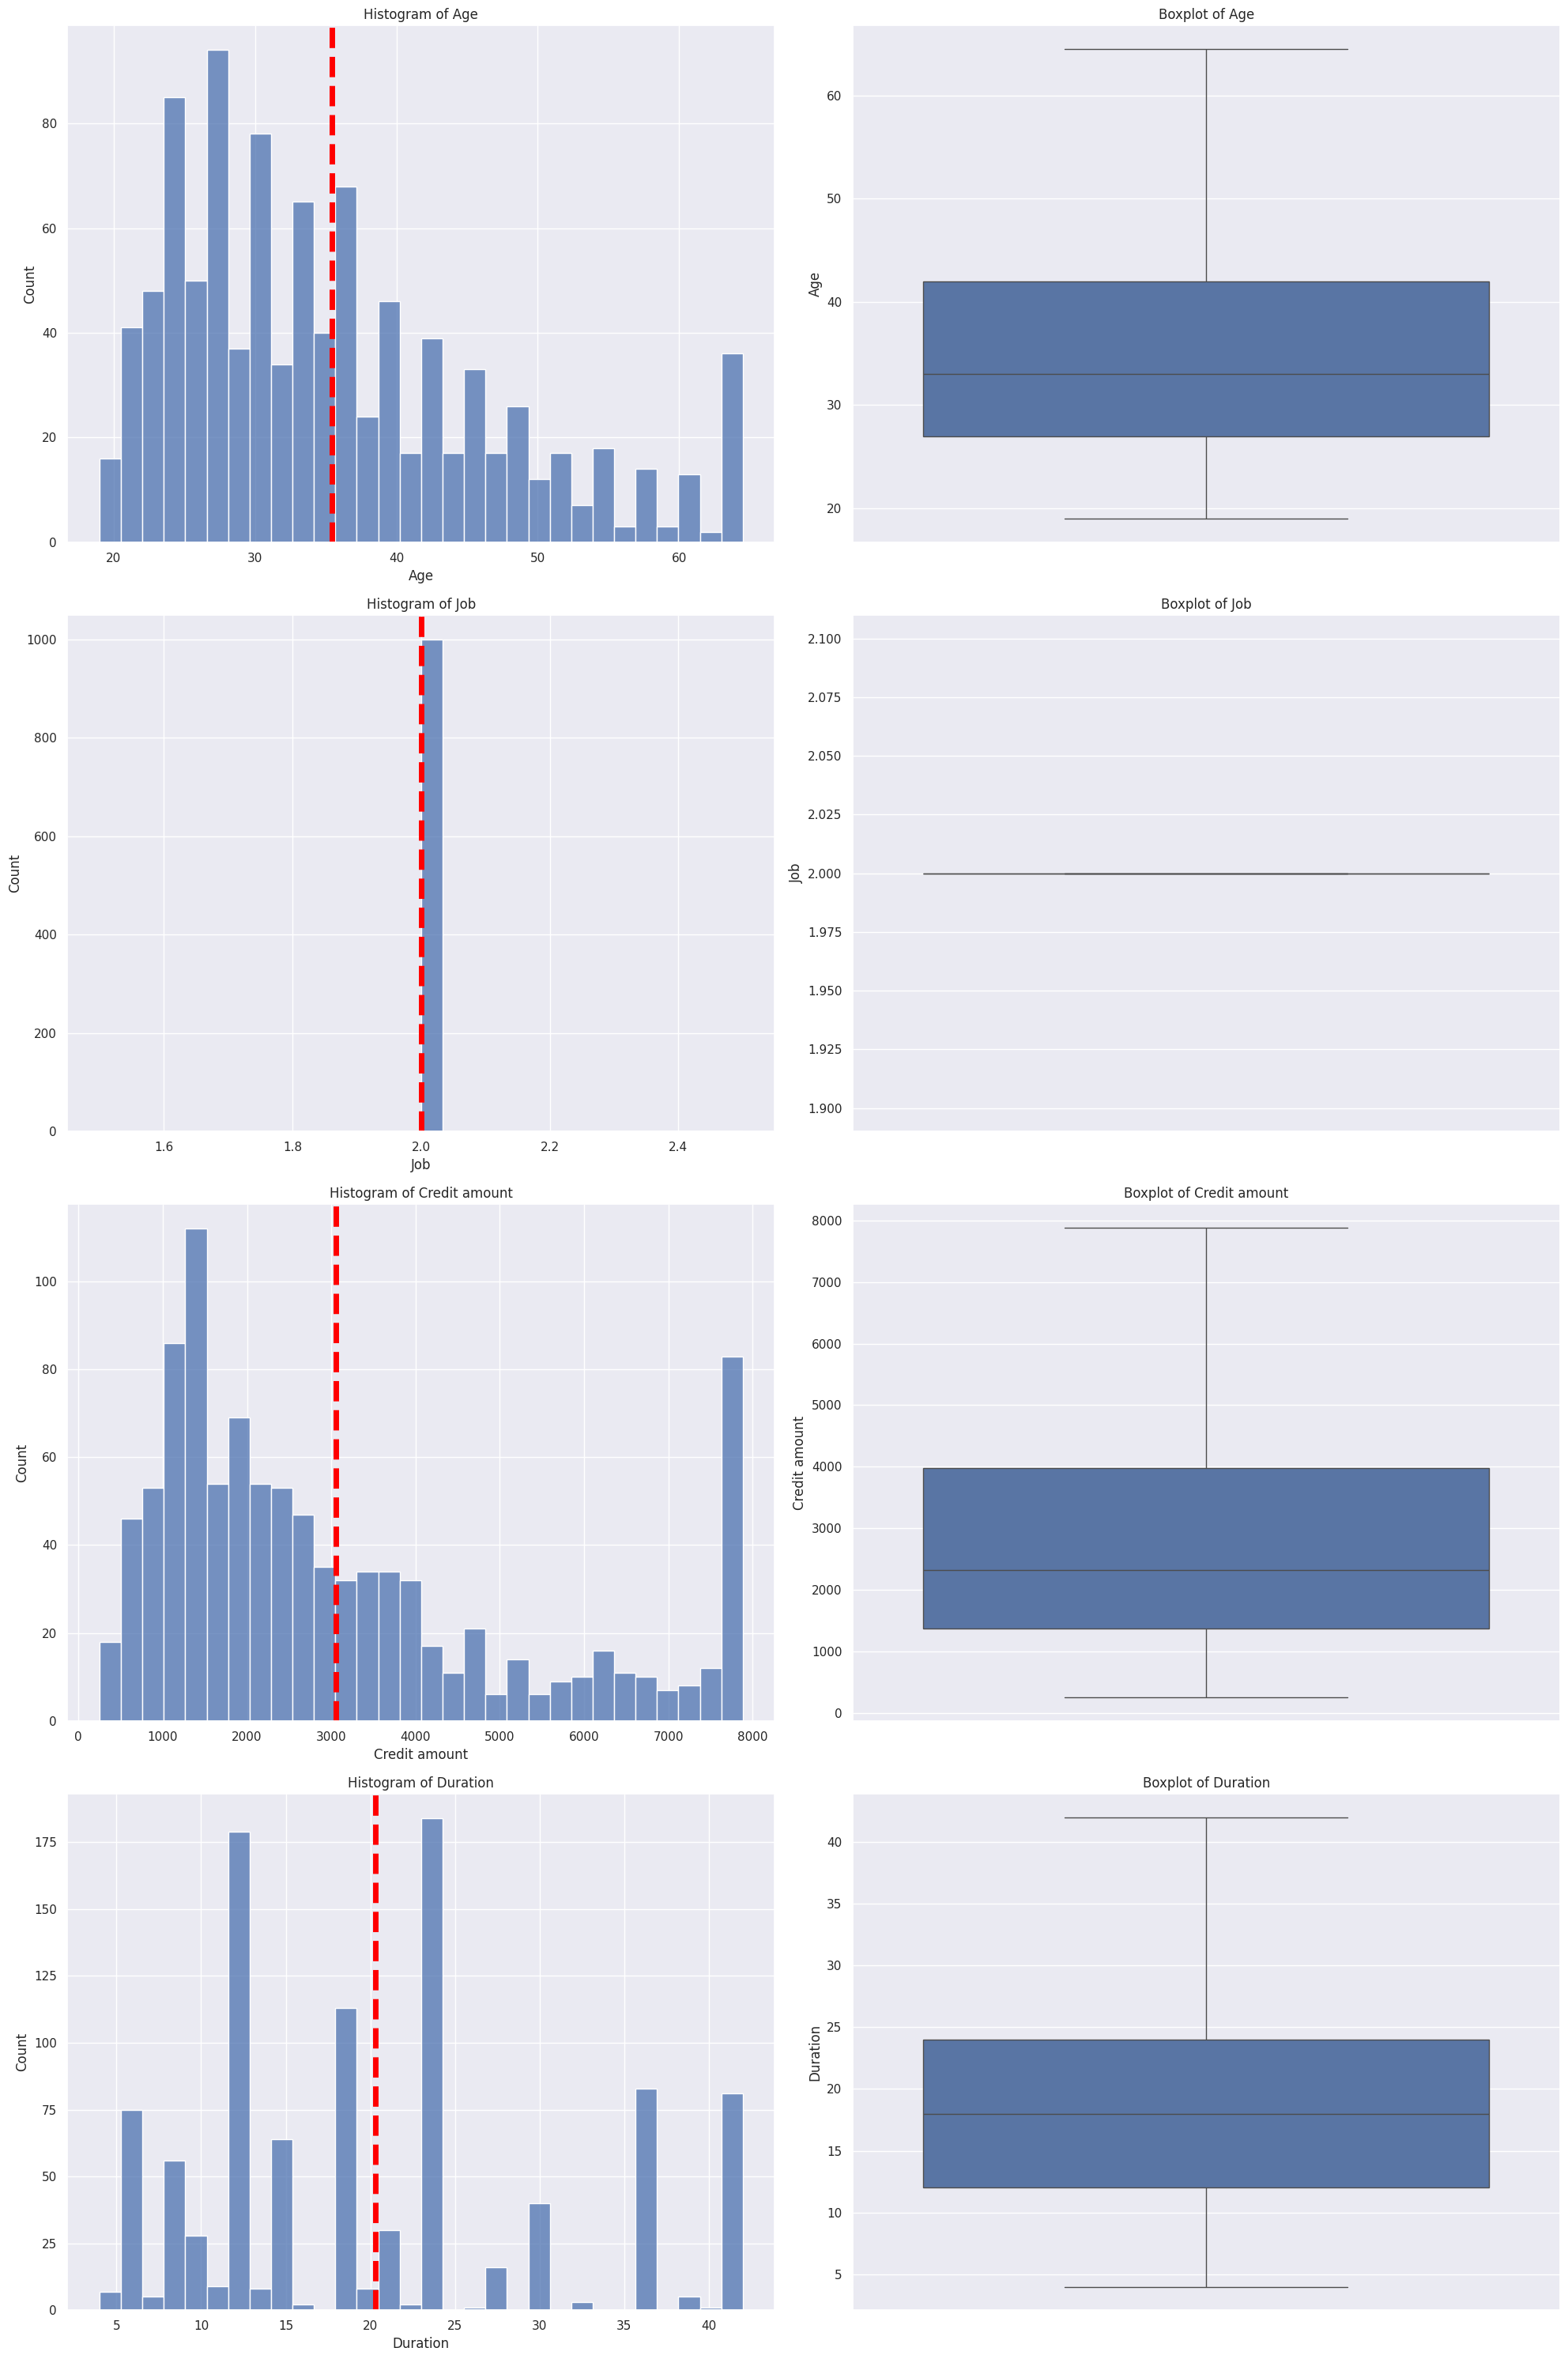

In [180]:





# definition du style de graphique
sns.set(style="darkgrid")
#nombre de colonnes
n_plots = len(numerical_columns)

#creation de la figure et d'un tableau d'axes
fig, ax = plt.subplots(n_plots, 2, figsize=(20, 30))
#fig, ax = plt.subplots(n_plots, 2, figsize=(20, 60))

# boucle pour obtenir l'index et le nom de la colonne
for i, col in enumerate(numerical_columns):
  # creation d'un histogramme pour chaque colone numerique actuelle
  sns.histplot(df_train[col], ax=ax[i][0], bins=30)


    # Ajoute une ligne verticale à la moyenne de la variable var
  #plt.axvline(df_train[col].mean(), ax=ax[i][0], color='red', linestyle='--', linewidth=5)
  ax[i][0].axvline(df_train[col].mean(), color='red', linestyle='--', linewidth=5)


  # titre de l'histogramme
  ax[i][0].set_title(f"Histogram of {col}")

  #Cette ligne crée un boxplot pour la colonne numérique actuelle col
  sns.boxplot(df_train[col], ax=ax[i][1])
  ax[i][1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show(); plt.close('all')

Traitement des  variables dummies

In [182]:




# Appliquer pd.get_dummies avec la liste modifiée
df_train = pd.get_dummies(df_train, columns=list(categorical_columns), drop_first=True,   dtype=int)

In [183]:
df_train.head()

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,64.5,2,1169.0,6,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,22.0,2,5951.0,42,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,49.0,2,2096.0,12,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,45.0,2,7882.0,42,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,53.0,2,4870.0,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Separation des donnnes d'entrainement et de test


In [187]:

# X = df_train.drop('Risk', axis=1)
# y = df_train['Risk']

# Assuming 'Risk' was transformed into 'Risk_good' and 'Risk_bad' during get_dummies
X = df_train.drop(['Risk_good'], axis=1)  # Drop the new dummy columns instead of 'Risk'
y = df_train[['Risk_good']] # Include the created dummies in the target variable.

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)


standardisation



In [190]:
from sklearn.preprocessing import StandardScaler


In [191]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Modeling


In [192]:
from sklearn.linear_model import LogisticRegression


In [193]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [194]:
y_pred = model.predict(X_test)

Mesure d'erreur



In [195]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score , root_mean_squared_error

In [196]:
from sklearn.metrics import classification_report

In [197]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.5228129047119374


Enregistrer le model

In [199]:
import joblib


In [204]:
#enregistrer le model

joblib.dump(model, '/content/drive/MyDrive/UV-BF/L3/Hackathon DataBeez/Data Science /modele_logistic_regression.joblib')

['/content/drive/MyDrive/UV-BF/L3/Hackathon DataBeez/Data Science /modele_logistic_regression.joblib']

In [203]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
